# Historico de Bitácoras Onomásticas del SEMEFO-DF
# Análisis de datos

Las [Historico de Bitácoras Onomásticas del Servicio Médico Forense del Distrito Federal (SEMEFO-DF)](https://datamx.io/dataset/ingresos-del-semefo-df-1965-1982-inai), han sido sistematizada por la Comisión Nacional de Búsqueda (CNB). Este conjunto de datos se obtuvo a través de una solicitud de acceso a la información disponible en el Portal de Transparencia del Instituto Nacional de acceso a la Información (INAI) en noviembre de 2023 y existe una copia en el portal ciudadano _datamx_ de Codeando México.

El **SEMEFO-DF (Servicio Médico Forense Distrito Federal)** ahora [INCIFO-CdMx](https://www.incifocdmx.gob.mx/) es una institución oficial encargada de realizar autopsias y estudios forenses para esclarecer las causas de muerte, principalmente en casos de muertes violentas, sospechosas o relacionadas con hechos delictivos. Las **Bitácoras Onomásticas (BO)** son registros administrativos históricos utilizados por el SEMEFO para documentar el ingreso de cadáveres o restos humanos a sus instalaciones. Estas bitácoras contienen información detallada sobre cada ingreso, como el nombre de la persona fallecida, su edad, sexo, fecha de ingreso, institución de procedencia y diagnóstico preliminar de causa de muerte. En muchos casos, estos registros incluyen datos clave para identificar patrones históricos de mortalidad, enfermedades comunes y factores de riesgo, lo que las convierte en una fuente valiosa para estudios demográficos, epidemiológicos y de salud pública.

Podemos acceder a esta información con la [Plataforma de Transparencia](https://www.plataformadetransparencia.org.mx/Inicio) o en [datamx](https://datamx.io/dataset/ingresos-del-semefo-df-1965-1982-inai).

### Código de color


1. <span style="background:#0504aa">---</span> Poblacion
2. <span style="background:#999999">---</span> S-D  <span style="background:#d9d9d9">---</span> S-D (DF)
3. <span style="background:#377eb8">---</span> Masculino  <span style="background:#80b1d3">---</span> Masculino (DF)
4. <span style="background:#984ea3">---</span> Femenino  <span style="background:#bebada">---</span> Femenino (DF)
5. <span style="background:#4daf4a">---</span> Conocido
6. <span style="background:#dbb40c">---</span> Desconocido
7. <span style="background:#04d8b2">---</span> Cadáver conocido
8. <span style="background:#fdff52">---</span> Cadáver desconocido
9. <span style="background:#c875c4">---</span> Recién nacido
10. <span style="background:#ff7f00">---</span> Feto
11. <span style="background:#f781bf">---</span> Miembros
12. <span style="background:#c85a53">---</span> Restos óseos 


In [1]:
from joblib import load
import pandas as pd
import numpy as np
from numpy import nan
from helper_pandas import *

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from scipy.stats import chi2_contingency
import statsmodels.api as sm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None 

in_file = "data_clean/HBO_clean.pkl"
with open(in_file, 'rb') as f:
     df = load(f)

#Quitar filas vacias
df = df[df['Identificacion']!='S-D']
display( df.shape )
df.tail()

(96825, 31)

,Numero_progresivo_transcrito,Nombre_completo_transcrito,Primer_apellido,Segundo_apellido,Nombres_propios,Fecha_transcrito,Fecha_estandar,Fecha_año,Fecha_mes,Fecha_semana,...,Procedencia_transcrito,Procedencia_estandar,Procedencia_extendido,Procedencia_alcaldia,Procedencia_clasificacion,Numero_acta_transcrito,Expediente_SEMEFO_transcrito,Bitacora_ingresos,Foja_transcrito,Observaciones
ID,,,,,,,,,,,,,,,,,,,,,
BO_1982_07489,S-D,placenta,NaN,NaN,NaN,1982-06-05,1982-06-05,1982.0,6.0,22,...,15a,GAM-2,Coord Territorial 2 Gustavo A Madero (Col Arag...,Gustavo A Madero,Judicial,960,3079,semefo_df_bo_1982,156,NaN
BO_1982_07490,S-D,5 dedos del pie derecho de desconocido,NaN,NaN,NaN,1982-06-05,1982-06-05,1982.0,6.0,22,...,32a,COY-2,Coord Territorial 2 Coyoacan (Col Romero de Te...,Coyoacan,Judicial,950,3060,semefo_df_bo_1982,156,NaN
BO_1982_07491,S-D,dedo de desconocido,NaN,NaN,NaN,1982-11-19,1982-11-19,1982.0,11.0,46,...,32a,COY-2,Coord Territorial 2 Coyoacan (Col Romero de Te...,Coyoacan,Judicial,2005,6389,semefo_df_bo_1982,156,NaN
BO_1982_07492,S-D,4 dedos de desconocido,NaN,NaN,NaN,1982-11-28,1982-11-28,1982.0,11.0,47,...,27a,XO-2,Coord Territorial 2 Xochimilco (Barrio de San ...,Xochimilco,Judicial,959,6528,semefo_df_bo_1982,156,NaN
BO_1982_07493,S-D,osamenta de desconocido,NaN,NaN,NaN,1982-10-11,1982-10-11,1982.0,10.0,41,...,9a,MH-1,Coord Territorial 1 Miguel Hidalgo – Hospital ...,Miguel Hidalgo,Hospital,4193,5629,semefo_df_bo_1982,156,no se recibio necropsia. es una osamenta.


In [2]:
from matplotlib.colors import LinearSegmentedColormap

dic_color = {'Poblacion':'#0504aa', 'S-D':'#999999', 'S-D (DF)':'#d9d9d9', 'Masculino':'#377eb8', 'Masculino (DF)':'#80b1d3', 
             'Femenino':'#984ea3', 'Femenino (DF)':'#bebada', 
             'Conocido':'#4daf4a', 'Desconocido':'#dbb40c', 
             'Cadáver conocido':'#04d8b2', 'Cadáver desconocido':'#fdff52', 
             'Recién nacido':'#c875c4', 
             'Feto':'#ff7f00', 
             'Miembros':'#f781bf', 
             'Restos óseos':'#c85a53', }

gray_to_green = LinearSegmentedColormap.from_list('gray_to_green', ['#d9d9d9', '#2a7e19'])


## Fecha
'Fecha_transcrito', 
'Fecha_estandar', 
'Fecha_año', 
'Fecha_mes',
'Fecha_diasemana',

### Ingresos anuales y diarios

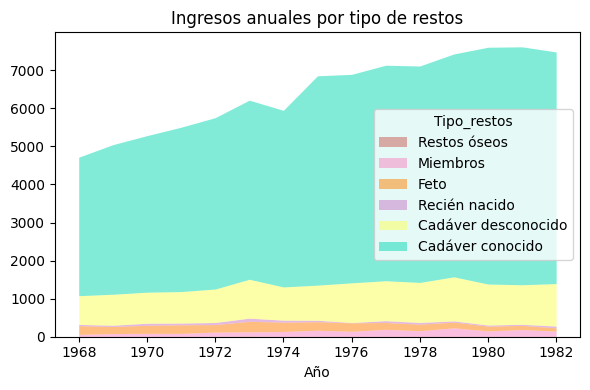

In [3]:
df_año_tipo = df.pivot_table(index='Fecha_año', columns='Tipo_restos', aggfunc='size')
df_año_tipo = df_año_tipo[df['Tipo_restos'].cat.categories].iloc[:, ::-1]
#display( df_año_tipo )

fig, ax = plt.subplots(figsize=(6, 4))
df_año_tipo.plot.area(ax=ax, color=dic_color, linewidth=0, alpha=0.5,)
ax.set_xlabel('Año')
ax.set_title('Ingresos anuales por tipo de restos')
ax.set_xticklabels([x.get_text().replace('.0','') for x in ax.get_xticklabels()]) # Remove negative sign from tick labels
plt.tight_layout()
#plt.savefig("imagenes/BO_TipoRestos+Sexo.svg")
plt.show()

**Prueba de independencia $\chi^2$**

Supuestos:
* Observaciones Independientes:
* Frecuencias Esperadas Suficientes: quitar `Restos óseos`
* Muestra Aleatoria Simple

Resultado:
**Muestras no independientes**: Chi-square: 721.48
**Estadísticamente significativa**: P-value: 2.36e-116

In [4]:
data = df_año_tipo.drop(columns=['Restos óseos','Recién nacido'])

# Perform Chi-square test
chi2, p_value, dof, expected = chi2_contingency(data)
print(f"Chi-square statistic: {chi2}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value}")

# visualize residuals
thr_resid = 5
resid = (data.values - expected) / np.sqrt(expected)
resid = pd.DataFrame(resid, index=data.index, columns=data.columns)
resid = resid.where(np.abs(resid) > thr_resid)
#display( resid )

Chi-square statistic: 598.3101962484517
Degrees of freedom: 42
P-value: 1.7391436102219905e-99


**Regresión Lineal**  
Variable independiente: año (X)  
Variable dependiente: decesos/ingresos (Y)
$$Y=\beta_0+\beta_1 X+\epsilon$$

Supuestos
* Linealidad
* Independencia
* Homocedasticidad: La varianza de los residuos es constante
* Normalidad residuos


Regresión Cadáver conocido anual
**R-squared**: 0.957
**Pendiente $\beta_1$** 193.043

Regresión Cadáver desconocido anual
**R-squared**: 0.825
**Pendiente $\beta_1$** 25.882

Regresión Miembros anual
**R-squared**: 0.687
**Pendiente $\beta_1$** 8.968

Regresión Feto anual
**R-squared**: 0.556
**Pendiente $\beta_1$** -8.918

Regresión Restos óseos anual
**R-squared**: 0.210 NO
**Pendiente $\beta_1$** -0.439

Regresión Recién nacido anual
**R-squared**: 0.058 NO
**Pendiente $\beta_1$** -0.893


In [5]:
X = sm.add_constant([i for i in data.index])

for col in data.columns:
    print(f"Regresión {col} anual")
    y1 = data[col]
    model1 = sm.OLS(y1, X).fit()
    #print(f"**R-squared**: {model1.rsquared:.3f}\n**Pendiente $\\beta_1$** {model1.params.x1:.3f}\n")
    print(model1.summary())

Regresión Miembros anual
                            OLS Regression Results                            
Dep. Variable:               Miembros   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     28.59
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           0.000133
Time:                        13:17:56   Log-Likelihood:                -70.228
No. Observations:                  15   AIC:                             144.5
Df Residuals:                      13   BIC:                             145.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.757e+04   331

/home/esther/anaconda3/envs/SEMEFO_busqueda/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
/home/esther/anaconda3/envs/SEMEFO_busqueda/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
/home/esther/anaconda3/envs/SEMEFO_busqueda/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
/home/esther/anaconda3/envs/SEMEFO_busqueda/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 o

**Ingresos diaros de toda la población**

En total, del 1968-01-01 al 1982-12-31 hay 5479 días
* Todos los días hubo ingresos
* Mediana de 17 ingresos diarios
* Min 2 ingresos, max 46 ingresos en un día

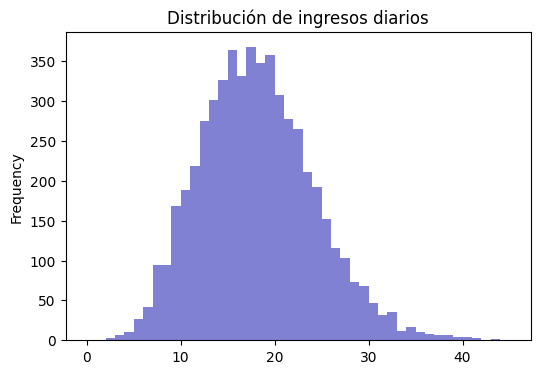

In [6]:
display()

fig, ax = plt.subplots(figsize=(6, 4))
df['Fecha_estandar'].value_counts().plot.hist(ax=ax, color=dic_color['Poblacion'], bins=range(46), alpha=0.5,
                      title='Distribución de ingresos diarios')
plt.show()

Outliers

In [7]:
data = df['Fecha_estandar'].value_counts()
data = data[data>30].reset_index()
data['Año'] = data['Fecha_estandar'].dt.year
data['Mes'] = data['Fecha_estandar'].dt.month
data['Dia'] = data['Fecha_estandar'].dt.day
data['Diasemana'] = data['Fecha_estandar'].dt.dayofweek
for col in data.columns:
    display(data[col].value_counts().head())

Fecha_estandar
1982-03-27    1
1979-12-26    1
1982-06-21    1
1981-12-26    1
1977-04-19    1
Name: count, dtype: int64

count
32    35
31    32
34    17
33    12
35    10
Name: count, dtype: int64

Año
1981    27
1982    23
1980    17
1979    16
1975    12
Name: count, dtype: int64

Mes
12    27
3     16
1     16
11    16
8     15
Name: count, dtype: int64

Dia
26    12
19     8
2      8
3      7
17     6
Name: count, dtype: int64

Diasemana
0    55
6    21
1    21
3    12
5    11
Name: count, dtype: int64

**Por tipo de restos**

,Cadáver conocido,Cadáver desconocido,Recién nacido,Feto,Miembros,Restos óseos,count
count,5479.000000,5479.00000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000
mean,13.975908,2.63497,0.115350,0.518160,0.374156,0.008578,17.627122
std,5.212267,1.94737,0.373721,0.780834,0.705295,0.111903,6.060894
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,10.000000,1.00000,0.000000,0.000000,0.000000,0.000000,13.000000
50%,14.000000,2.00000,0.000000,0.000000,0.000000,0.000000,17.000000
75%,17.000000,4.00000,0.000000,1.000000,1.000000,0.000000,21.000000
max,36.000000,18.00000,5.000000,6.000000,9.000000,3.000000,46.000000


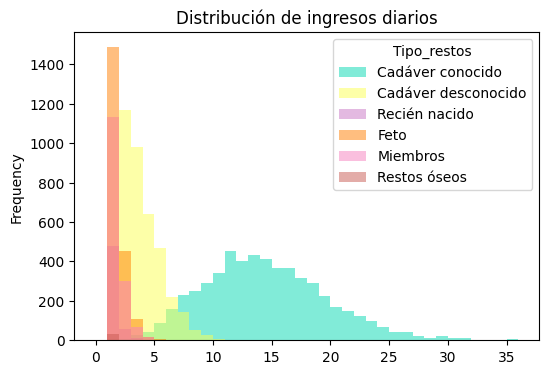

In [8]:
ing_diarios = df.pivot_table(index='Fecha_estandar', columns='Tipo_restos', aggfunc='size').sort_index().replace(0,nan)
display(pd.concat( [ing_diarios.fillna(0).describe(),df['Fecha_estandar'].value_counts().describe()], axis=1 ))

fig, ax = plt.subplots(figsize=(6, 4))
ing_diarios.plot.hist(ax=ax, color=dic_color, bins=range(37), alpha=0.5,
                      title='Distribución de ingresos diarios')

#plt.savefig("imagenes/BO_Distribucion_TipoRestos+IngresosDiarios.svg")
plt.show()

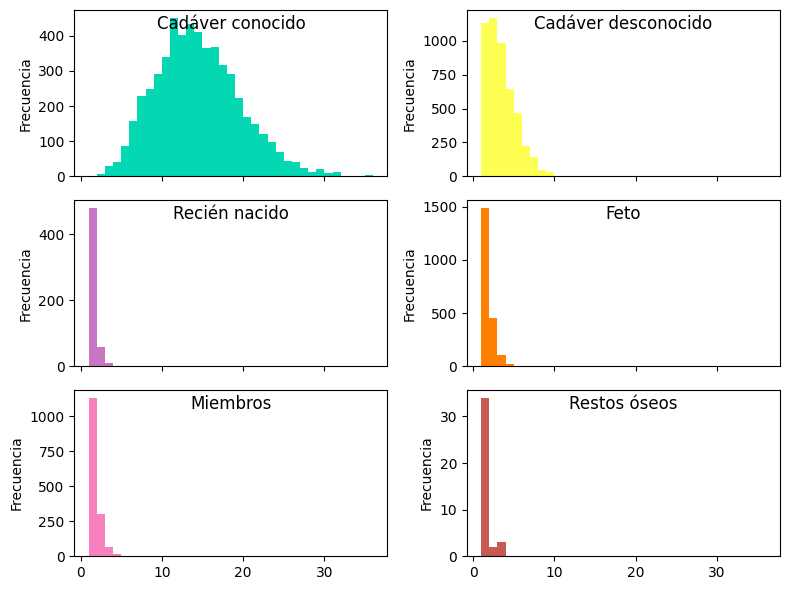

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 6), sharex=True)
axes = axes.flatten()

for ax,col in zip(axes,ing_diarios.columns):
    ing_diarios[col].plot.hist(ax=ax, color=dic_color[col], bins=range(1,37), ylabel='Frecuencia' )
    ax.set_title(col, y=1.0, pad=-14)
    ax.set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

### Periodicidad entre años y semana



**Mediana de ingresos semanales**

In [10]:
ingresos_semanales = df.pivot_table(index='Fecha_semana', columns='Fecha_año', aggfunc='size').sort_index()
ingresos_semanales.median()

Fecha_año
1968.0     90.0
1969.0     94.0
1970.0     99.0
1971.0    102.0
1972.0    110.0
1973.0    117.0
1974.0    114.0
1975.0    132.0
1976.0    130.0
1977.0    134.0
1978.0    136.0
1979.0    142.0
1980.0    144.0
1981.0    146.0
1982.0    143.0
dtype: float64

* Incremento en ingresos en diciembre y primera de enero

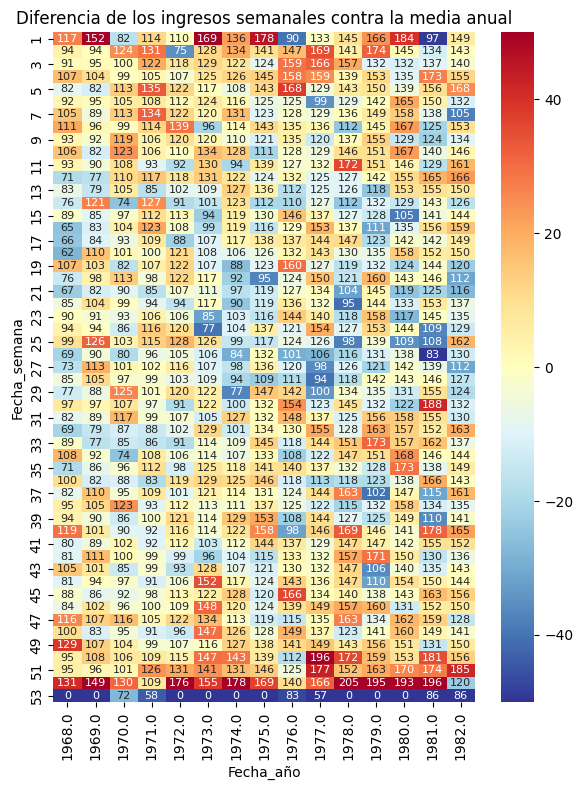

In [11]:
fig, ax = plt.subplots(figsize=(6, 8))
sns.heatmap(ax=ax, data=ingresos_semanales-ingresos_semanales.median(), 
            vmin=-50, vmax=50, cmap='RdYlBu_r', 
            annot=ingresos_semanales, fmt='.0f', annot_kws={"fontsize":8})
plt.title('Diferencia de los ingresos semanales contra la media anual')
plt.tight_layout()
#plt.savefig("imagenes/BO_Semana+Ingresos.svg")
plt.show()

In [12]:
ingresos_semanales.median()

Fecha_año
1968.0     90.0
1969.0     94.0
1970.0     99.0
1971.0    102.0
1972.0    110.0
1973.0    117.0
1974.0    114.0
1975.0    132.0
1976.0    130.0
1977.0    134.0
1978.0    136.0
1979.0    142.0
1980.0    144.0
1981.0    146.0
1982.0    143.0
dtype: float64

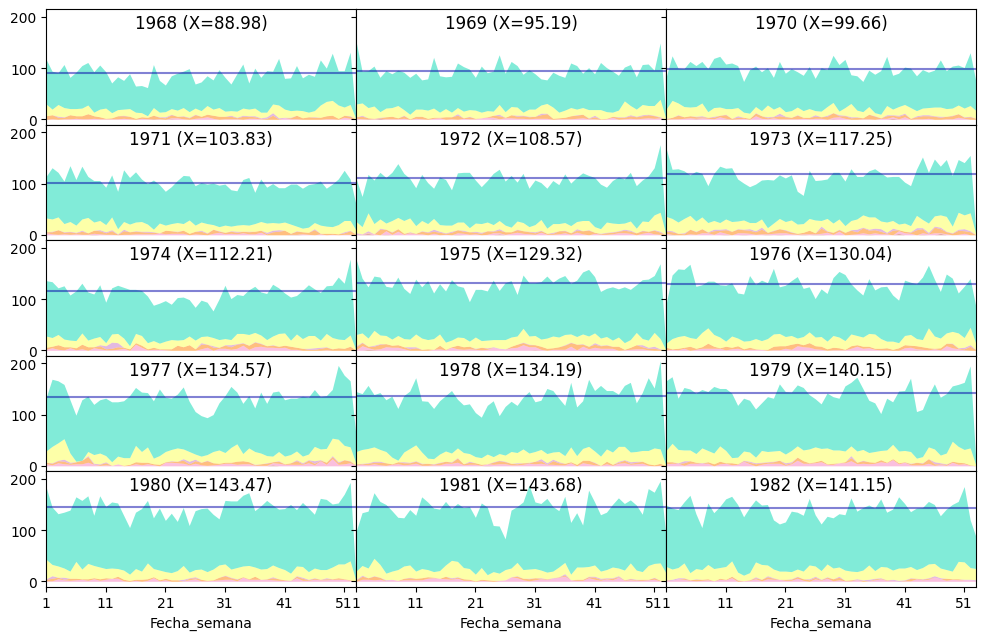

In [13]:
ncols = 3
fig, axes = plt.subplots(nrows=round(df['Fecha_año'].nunique()/ncols), ncols=ncols, 
                         figsize=(12,df['Fecha_año'].nunique()*1.5/ncols), 
                         sharex=True, sharey=True, )
for ax,año in zip(axes.flatten(),df['Fecha_año'].sort_values().dropna().unique()):
    data = df.loc[df['Fecha_año']==año,['Fecha_semana','Tipo_restos']]
    mediana_semanal = data.groupby('Fecha_semana', observed=True).size().median()
    data = data.pivot_table(index='Fecha_semana',columns='Tipo_restos',aggfunc='size').iloc[:, ::-1]
    data.plot.area(ax=ax, color=dic_color, linewidth=0, alpha=0.5)
    ax.axhline(y=mediana_semanal, color=dic_color['Poblacion'], alpha=0.5)
    ax.margins(x=0)
    ax.set_title(f"{int(año)} (X={data.sum(axis=1).mean().round(2)})", y=1.0, pad=-14)
    ax.get_legend().remove()
plt.subplots_adjust(wspace=0, hspace=0)
#plt.savefig("imagenes/BO_SemanaAño+TipoRestos.svg")
plt.show()

### Ingresos por dia de la semana

In [14]:
df['Fecha_diasemana'].value_counts()

Fecha_diasemana
Lunes        16578
Martes       15090
Miercoles    13615
Jueves       13132
Domingo      12731
Sábado       12727
Viernes      12706
Name: count, dtype: int64

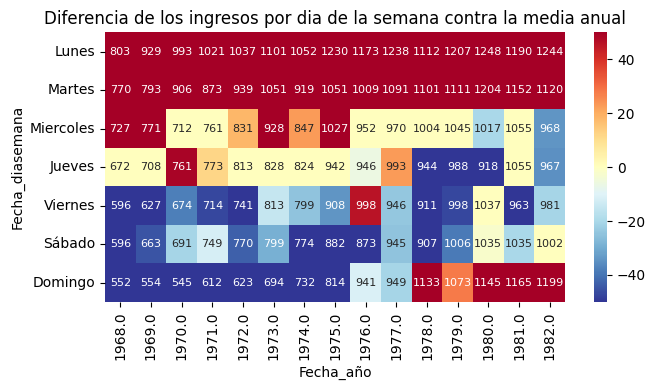

In [15]:
ingresos_diasem = df.pivot_table(index='Fecha_diasemana', columns='Fecha_año', aggfunc='size').sort_index()

fig, ax = plt.subplots(figsize=(7, 4))
sns.heatmap(ax=ax, data=ingresos_diasem-ingresos_diasem.median(), 
            vmin=-50, vmax=50, cmap='RdYlBu_r', 
            annot=ingresos_diasem, fmt='.0f', annot_kws={"fontsize":8})
plt.title('Diferencia de los ingresos por dia de la semana contra la media anual')
plt.tight_layout()
#plt.savefig("imagenes/BO_DiaSemana+Ingresos.svg")
plt.show()

**Done**